# SciPy

**SciPy** - convenience библиотека-коллекция.  
В ней хранится множество различных широко используемых численных математических алгоритмов.  
Для обеспечения быстродействия SciPy написана с использованием NumPy.  
Все, что есть в SciPy, распределено по следующим модулям
1. cluster - алгоритмы кластеризации
2. constants - константы, встречающиеся в математике и физике
3. fftpack - быстрое преобразование Фурье
4. integrate - решение ОДУ и численное интегрирование
5. interpolate - интерполяция, построение сплайнов
6. io - чтение и конверсия между различными форматами данных
7. linalg - линейная алгебра
8. ndimage - работа c многомерными изображениями
9. odr - особый вид регрессии. Сюда мы пока не лезем.
10. optimize - численная оптимизация
11. signal - обработка сигналов
12. spatial - пространственные структуры данных и алгоритмы
13. special - специальные функции
14. stats - распределения и статистики

### Линейная алгебра

In [3]:
# давайте для примера сделаем на SciPy все то же самое, что мы делали используя SymPy

import numpy as np
from scipy import linalg

a = np.array([[6, 1, 1], [4, -2, 5], [2, 8, 7]], dtype=np.float64)
print("A:")
print(a)

A:
[[ 6.  1.  1.]
 [ 4. -2.  5.]
 [ 2.  8.  7.]]


In [4]:
b = linalg.inv(a)
print("A^-1:")
print(b)

A^-1:
[[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


In [5]:
print("A * A^-1:")
print(a @ b)

A * A^-1:
[[ 1.00000000e+00  2.77555756e-17  2.77555756e-17]
 [-1.52655666e-16  1.00000000e+00  2.77555756e-17]
 [-1.24900090e-16  1.11022302e-16  1.00000000e+00]]


In [7]:
eigvals, eigvecs = linalg.eig(a)
for i, eigval in enumerate(eigvals):
    print("================")
    print("eigval:", eigval)
    print("eigvec:", eigvecs[:,i])
    print("delta:", a.dot(eigvecs[:, i]) - eigval * eigvecs[:, i])

eigval: (11.248623431365834+0j)
eigvec: [0.24511338 0.40622202 0.88028581]
delta: [ 4.44089210e-16+0.j  1.77635684e-15+0.j -3.55271368e-15+0.j]
eigval: (5.092850544301695+0j)
eigvec: [ 0.75669314 -0.03352363 -0.65291014]
delta: [-4.44089210e-16+0.j -8.60422844e-16+0.j  1.33226763e-15+0.j]
eigval: (-5.34147397566753+0j)
eigvec: [ 0.02645665 -0.84078293  0.54072554]
delta: [6.10622664e-16+0.j 0.00000000e+00+0.j 1.33226763e-15+0.j]


In [8]:
# теперь решим систему линейных уравнений 

a = np.array([[3, 2, 0],
              [1, -1, 0],
              [0, 5, 1]])

b = np.array([2, 4, -1])

x = linalg.solve(a, b)

print(x)
print(a @ x - b)

[ 2. -2.  9.]
[0. 0. 0.]


### FFT 

**F**ast **F**ourier **T**ransform - это быстрый способ посчитать фурье-разложение функции.  
Хорошее изложение преобразования Фурье для чайников есть в учебнике [Иванова](https://lib.mipt.ru/search/?q=%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2+%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9+%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7+2) (скачать PDF второй части можно по ссылке) по матану.  
Как работает FFT можно почитать в ["Агоритмы - построение и анализ"](https://lib.mipt.ru/search/?q=%D0%9A%D0%BE%D1%80%D0%BC%D0%B5%D0%BD) Кормэна.

In [15]:
import matplotlib.pyplot as plt
from scipy.fft import fft

T = 1.0 / 800.0
N = 600

x = np.linspace(0.0, N * T, N)

# Простая функция
y = np.sin(1 * 2.0 * np.pi * x)

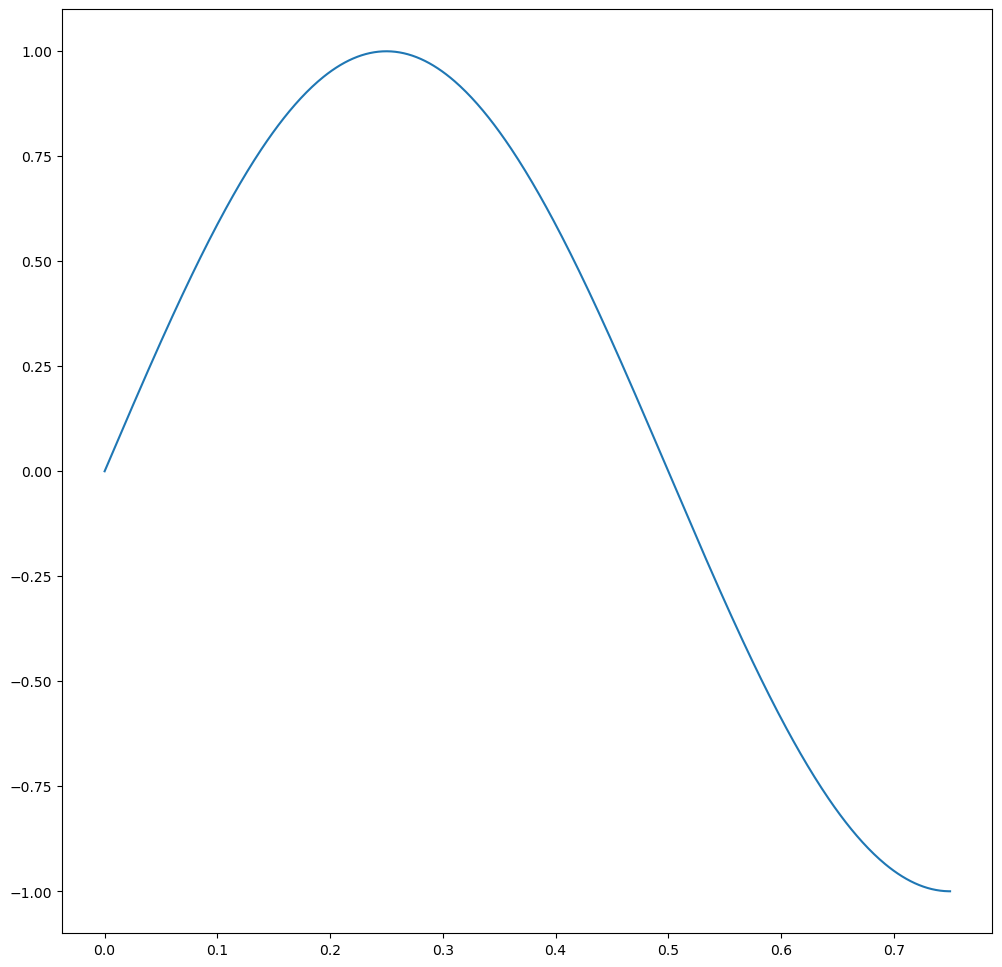

In [16]:
# Посмотрим на саму функцию
plt.figure(figsize=(12, 12))
plt.plot(x, y)
plt.show()

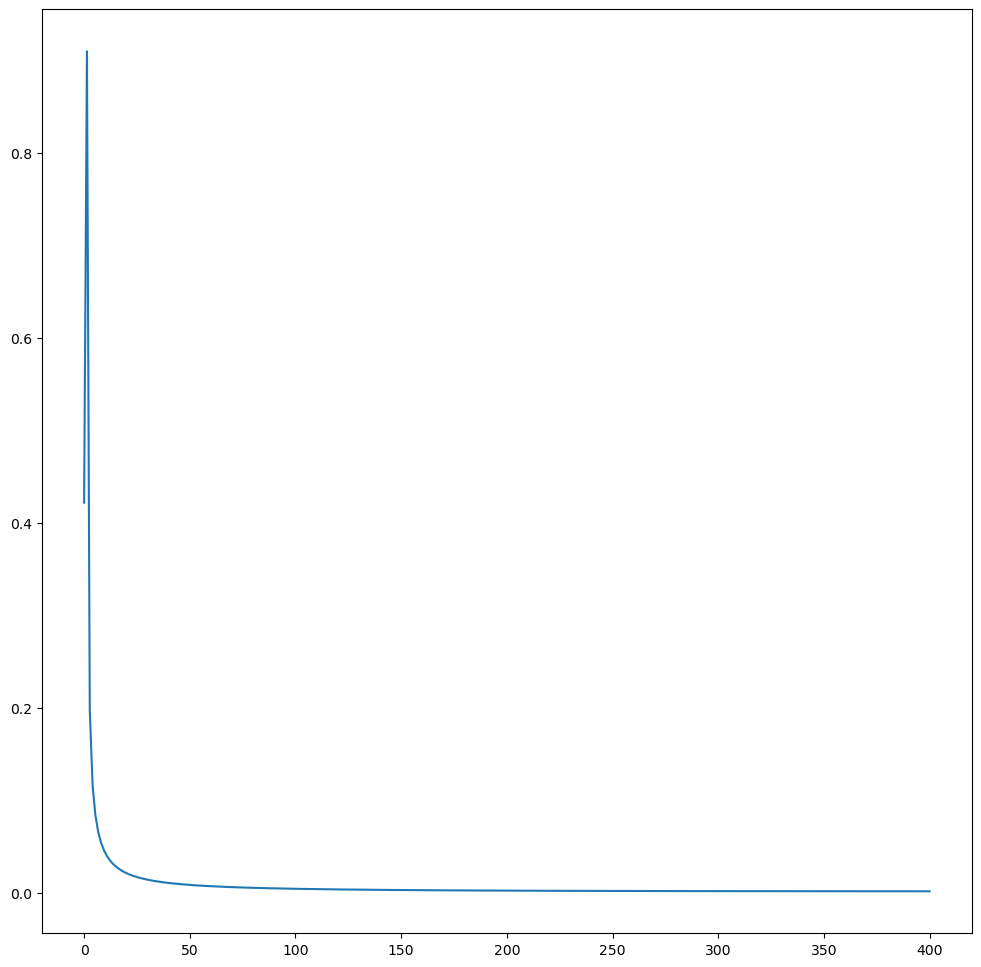

In [19]:
# Получим Фурье и посмотрим спектр
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(12, 12))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

In [21]:
#теперь добавим вторую гармонику и немного шума

rng = np.random.default_rng()
y_noise = rng.normal(size = x.size)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x) + y_noise

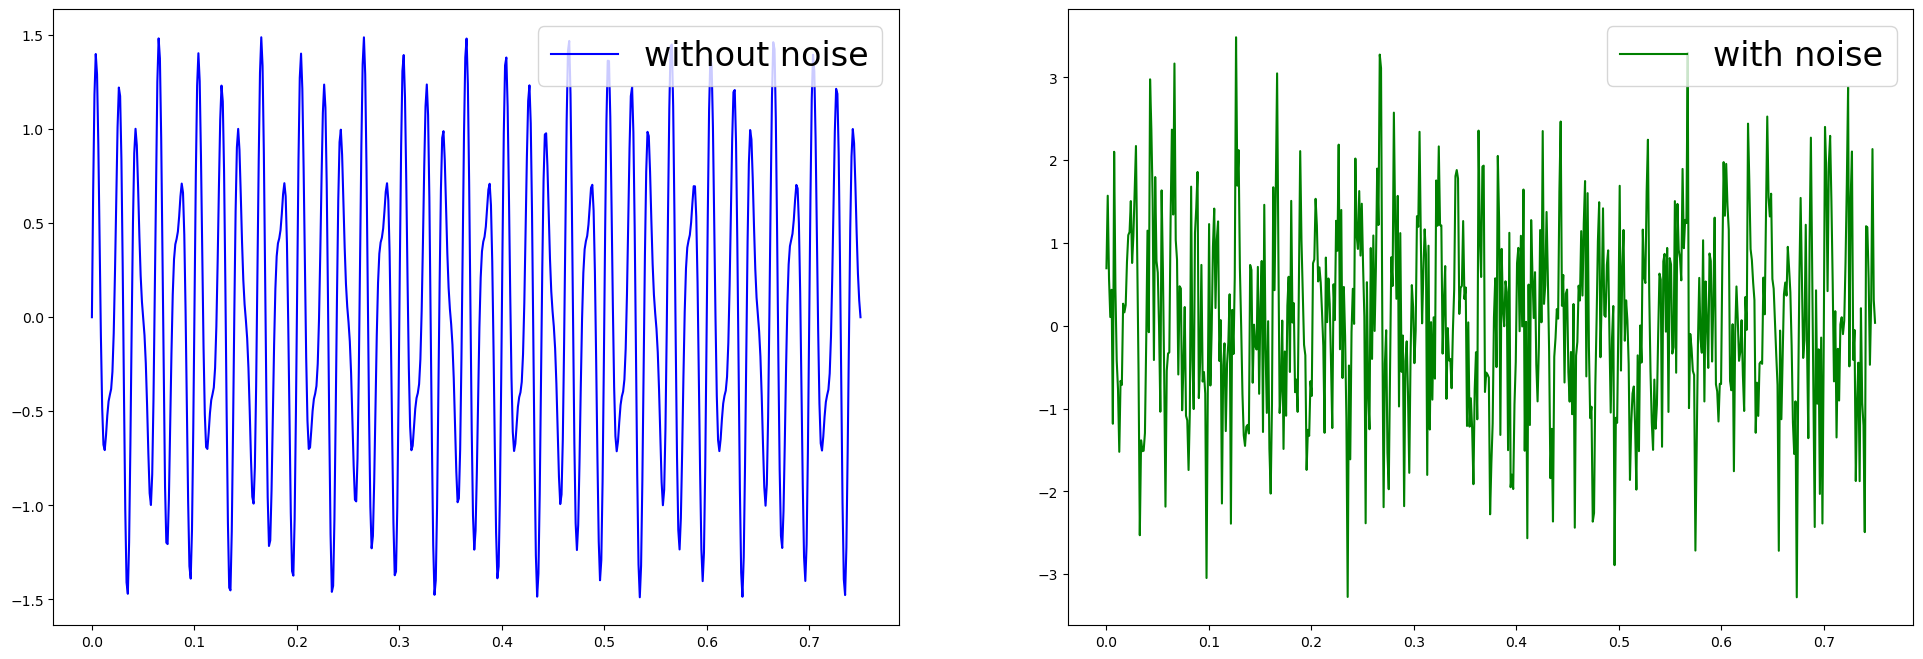

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
axes[0].plot(x, y-y_noise, color='b', label='without noise')
axes[1].plot(x, y, color='g', label='with noise')
axes[0].legend(fontsize=24)
axes[1].legend(fontsize=24)
plt.show()

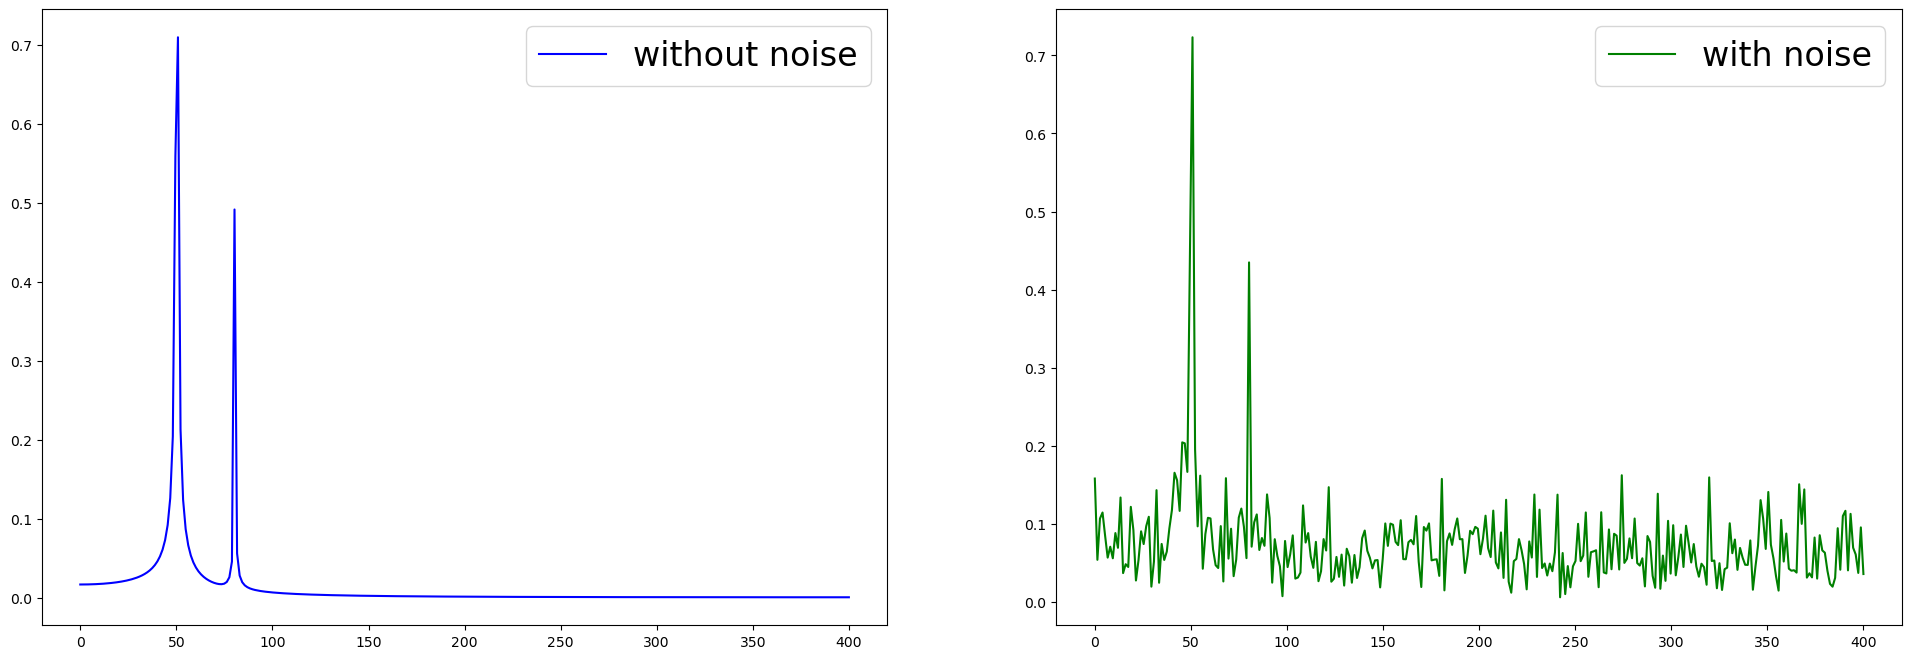

In [36]:
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
axes[0].plot(xf, 2.0/N * np.abs(fft(y-y_noise)[:N//2]), color='b', label='without noise')
axes[1].plot(xf, 2.0/N * np.abs(fft(y)[:N//2]), color='g', label='with noise')
axes[0].legend(fontsize=24)
axes[1].legend(fontsize=24)
plt.show()


### Регрессия
Задачу поиска параметрической кривой, проходящей через конечный набор точек,   
можно решать с помощью метода минимизации среднеквадратичной функциии потерь.
Имлементация этого алгоритма есть в SciPy.

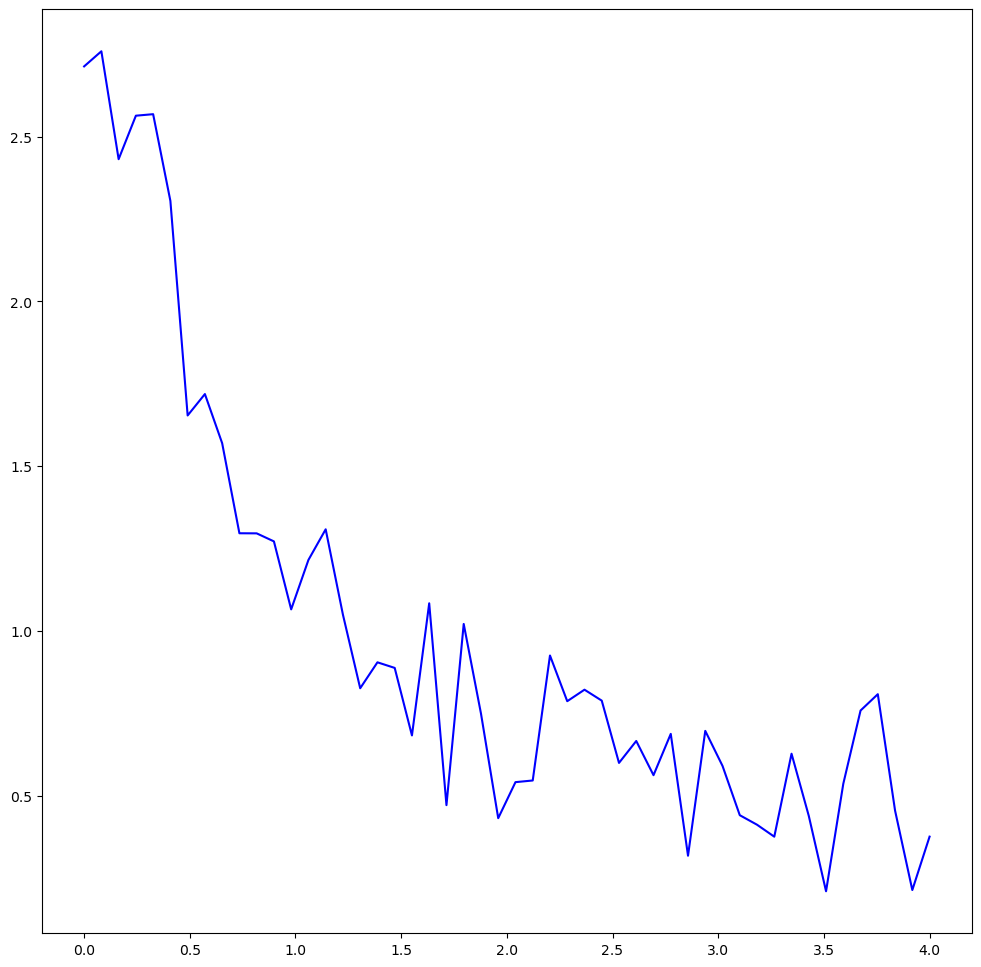

In [41]:
from scipy.optimize import curve_fit

# Функция, которой описываются наши данные
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Настоящие значения параметров
real_params = [2.5, 1.3, 0.5]
# Набор точек
xdata = np.linspace(0, 4, 50)
y = func(xdata, *real_params)

# Шум по оси OY в наших точках
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size = xdata.size)
ydata = y + y_noise

# Посмотрим на вид функции с шумом
plt.figure(figsize=(12, 12))
plt.plot(xdata, ydata, 'b-', label='data + noise: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(real_params))
plt.show()

[2.50540899 1.19570635 0.46584178]


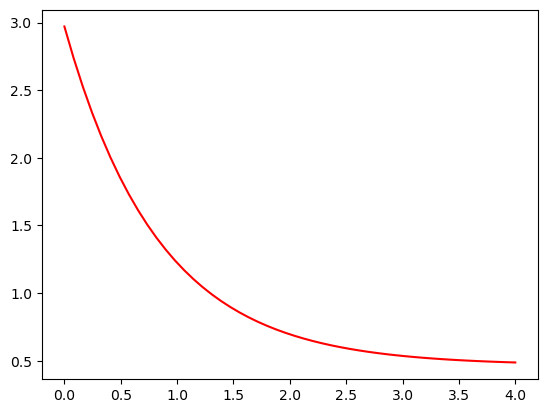

In [42]:
# Попросим определить параметры функции по точкам
params1, _ = curve_fit(func, xdata, ydata)
# Напечатаем и нарисуем результат
print(params1)
plt.plot(xdata, func(xdata, *params1), 'r-', label='unconstrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(params1))

[2.45190149 1.         0.38556066]


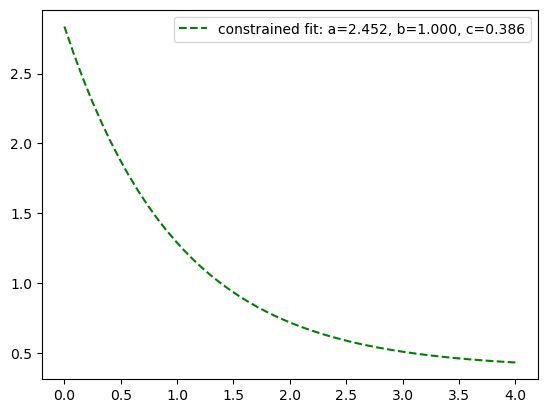

In [43]:
# Попросим определить параметры функции по точкам, добавив ограничений на диапазоны значений
params2, _ = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
# Напечатаем и нарисуем этот результат тоже
print(params2)
plt.plot(xdata, func(xdata, *params2), 'g--', label='constrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(params2))

plt.legend()
plt.show()

### Оптимизация

В SciPy реализовано несколько методов градиентной оптимизации, а также предусмотрены возможности написания собственных оптимизаторов

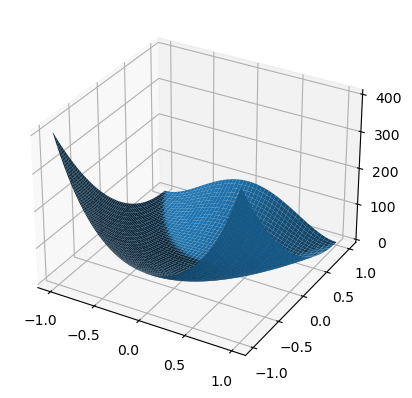

In [49]:
# Посмотрим на функцию Розенброка, которая для градиентных оптимизаторов 
# считается, в некотором смысле, "сложной".

from scipy.optimize import rosen
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen([X, Y]))
plt.show()

In [60]:
from scipy.optimize import minimize

minimize(rosen, [0., 0.], method='Nelder-Mead')

 final_simplex: (array([[1.00000439, 1.00001064],
       [0.99996163, 0.99992454],
       [1.00002803, 1.00005254]]), array([3.68617692e-10, 1.63627702e-09, 2.02249112e-09]))
           fun: 3.6861769151759075e-10
       message: 'Optimization terminated successfully.'
          nfev: 146
           nit: 79
        status: 0
       success: True
             x: array([1.00000439, 1.00001064])

In [61]:
minimize(rosen, [0., 0.], method='L-BFGS-B')

      fun: 9.138633836908994e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.76946322e-06, -1.40038480e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 78
      nit: 21
     njev: 26
   status: 0
  success: True
        x: array([0.99999698, 0.99999395])

In [64]:
minimize(rosen, [0., 0.], method='CG')

     fun: 2.0085382242752512e-11
     jac: array([ 5.41245606e-06, -2.70523446e-06])
 message: 'Optimization terminated successfully.'
    nfev: 165
     nit: 21
    njev: 55
  status: 0
 success: True
       x: array([0.99999552, 0.99999103])